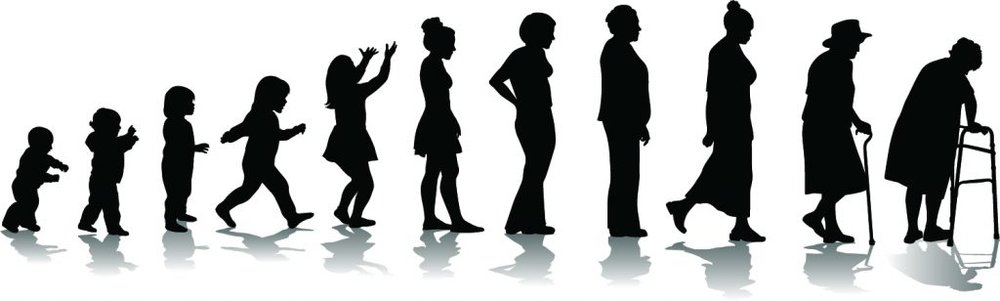

# <center>Age and Gender Prediction</center>


The <a href="https://susanqq.github.io/UTKFace/" style="color:#D18358"> UTKFace dataset </a> is a large-scale face dataset consisting of over 20,000 images. The images cover a wide range of ages and races and include both males and females. 

Using this dataset, I will be attempting to create a model capable of predicting the age and gender of an individual. I will be using part one of the cropped variations of the images, of which there are almost 10,000. However, I will only be using the first 8000 of these images due to memory limitations.

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style="background-color:#D18358; border-color:#D18358">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#imports" role="tab" aria-controls="profile" style="color:#8F908E">Imports<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:#8F908E">Loading Data<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#visual" role="tab" aria-controls="settings" style="color:#8F908E">Visualising Data<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">3</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#split" role="tab" aria-controls="settings" style="color:#8F908E">Train Test Split<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">4</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#model" role="tab" aria-controls="settings" style="color:#8F908E"> Creating the Model<span class="badge badge-primary badge-pill" style="background-color:#D18358; border-color:#D18358">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#train" role="tab" aria-controls="settings" style="color:#8F908E">Training the Models<span class="badge badge-primary badge-pill"  style="background-color:#D18358; border-color:#D18358">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#eval" role="tab" aria-controls="settings" style="color:#8F908E">Evaluating the Models<span class="badge badge-primary badge-pill"  style="background-color:#D18358; border-color:#D18358">7</span></a>  

# <h1 id= 'imports'><span class="label label-default" style="background-color:#D18358; font-size:20px">1. Imports</span></h1>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt

# <h1 id= 'load'><span class="label label-default" style="background-color:#D18358; font-size:20px">2. Loading Data</span></h1>

In [88]:
images = []
ages = []
genders = []
for i in os.listdir('../ML Project/archive/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('../ML Project/archive/crop_part1/' + i))

In [89]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1


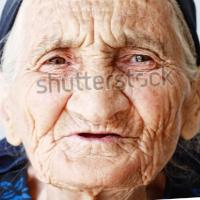

100 1


In [90]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

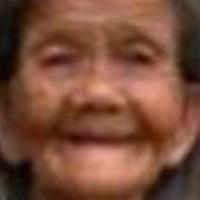

100 1


In [91]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

So 0 corresponds to male, 1 corresponds to female.

# <h1 id= 'visual'><span class="label label-default" style="background-color:#D18358; font-size:20px">3. Visualising and Preparing Data</span></h1>

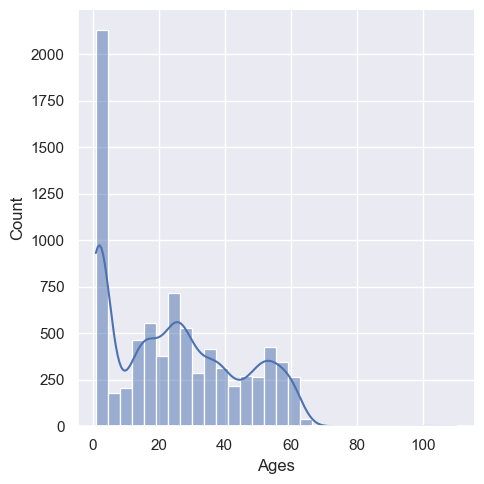

In [92]:
sns.set_theme()
sns.displot(df['Ages'],kde=True, bins=30)

Too many faces of people between 0 and 4 years old. The model would fit too well to these ages and not enough to the other ages. To resolve this I'm only going to include a third of the images between these ages.

In [93]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

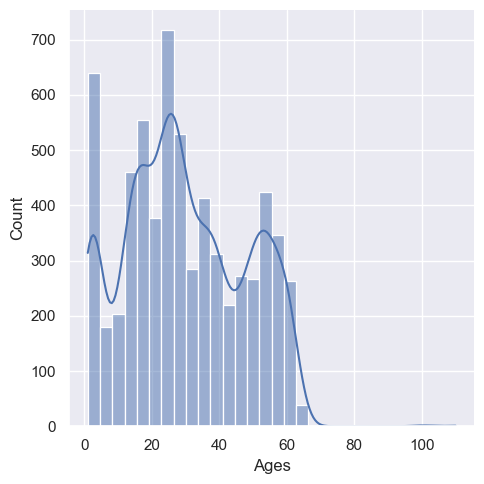

In [94]:
sns.displot(df['Ages'],kde=True, bins=30)

This looks much better! The dataframe is more representative of the population now. However, there aren't many images of people over 80, which would cause the model to not train well enough on those ages. It's best to just remove over 80s and only have a model that can predict the ages of people under 80.

In [95]:
df = df[df['Ages'] < 80]

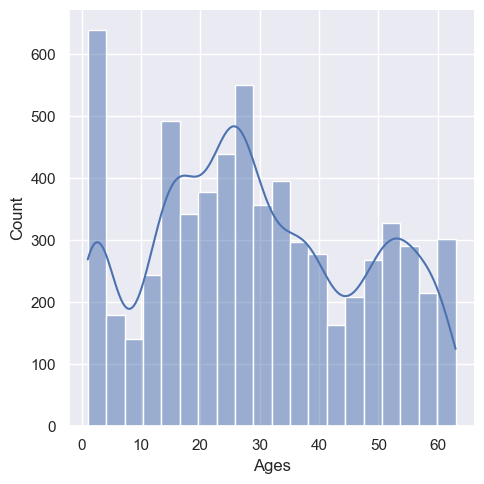

In [96]:
sns.displot(df['Ages'],kde=True, bins=20)

In [97]:
sns.countplot(df['Genders'])

KeyError: 0

Not sure what 3 corresponds to - both genders, no gender, unknown, or just an error in the data entry? To be safe, I am going to remove any rows where gender equals 3.

In [98]:
df = df[df['Genders'] != 3]
sns.countplot(df['Genders'])

KeyError: 0

In [99]:
x = []
y = []

for i in range(len(df)):
    img = df['Images'].iloc[i].copy()
    img_recized = img.resize((200,200), Image.Resampling.LANCZOS)
    ar = np.asarray(img_recized)
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

# <h1 id= 'split'><span class="label label-default" style="background-color:#D18358; font-size:20px">4. Train Test Split</span></h1>

In [100]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

# <h1 id= 'model'><span class="label label-default" style="background-color:#D18358; font-size:20px">5. Creating the Models</span></h1>

I will create two individual models - one to predict age and one to predict gender. The age model should be capable of returning continuous values which I will round to the nearest integer, and the gender model should return a binary result.

In [113]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])


# <h1 id= 'train'><span class="label label-default" style="background-color:#D18358; font-size:20px">6. Training the Models</span></h1>

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
163/163 [==============================] - 138s 844ms/step - loss: 440.4122 - val_loss: 360.0117
Epoch 2/50
163/163 [==============================] - 135s 827ms/step - loss: 357.5476 - val_loss: 301.5394
Epoch 3/50
163/163 [==============================] - 135s 824ms/step - loss: 330.5070 - val_loss: 251.5840
Epoch 4/50
163/163 [==============================] - 134s 823ms/step - loss: 296.0820 - val_loss: 225.0399
Epoch 5/50
163/163 [==============================] - 134s 818ms/step - loss: 292.6290 - val_loss: 249.2467
Epoch 6/50
163/163 [==============================] - 133s 816ms/step - loss: 277.1392 - val_loss: 235.2583
Epoch 7/50
163/163 [==============================] - 136s 832ms/step - loss: 275.6781 - val_loss: 289.1640
Epoch 8/50
163/163 [==============================] - 137s 838ms/step - loss: 268.6240 - val_loss: 221.1250
Epoch 9/50
163/163 [==============================] - 137s 837ms/step - loss: 261.5303 - val_loss: 202.7186
Epoch 10/50
163/163 [=======

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
82/82 [==============================] - 130s 2s/step - loss: 0.6368 - accuracy: 0.6303 - val_loss: 0.5810 - val_accuracy: 0.6933
Epoch 2/50
82/82 [==============================] - 129s 2s/step - loss: 0.5915 - accuracy: 0.6983 - val_loss: 0.5499 - val_accuracy: 0.7164
Epoch 3/50
82/82 [==============================] - 129s 2s/step - loss: 0.5541 - accuracy: 0.7199 - val_loss: 0.5143 - val_accuracy: 0.7433
Epoch 4/50
82/82 [==============================] - 130s 2s/step - loss: 0.5218 - accuracy: 0.7420 - val_loss: 0.4861 - val_accuracy: 0.7671
Epoch 5/50
82/82 [==============================] - 130s 2s/step - loss: 0.5047 - accuracy: 0.7612 - val_loss: 0.4673 - val_accuracy: 0.7748
Epoch 6/50
82/82 [==============================] - 131s 2s/step - loss: 0.4813 - accuracy: 0.7820 - val_loss: 0.4381 - val_accuracy: 0.7840
Epoch 7/50
82/82 [==============================] - 130s 2s/step - loss: 0.4712 - accuracy: 0.7850 - val_loss: 0.4356 - val_accuracy: 0.7879
Epoch 8/50
82

Now we save the trained model. This will avoid us having to retrain it if we restart the kernel.

In [ ]:
agemodel.save("agemodel.hdf5")
genmodel.save("genmodel.hdf5")

Let's load the model saved

In [115]:
agemodel = load_model("agemodel.hdf5")
genmodel = load_model("genmodel.hdf5")

In [116]:
genmodel.count_params()

4426945

# <h1 id= 'eval'><span class="label label-default" style="background-color:#D18358; font-size:20px">7. Evaluating the Gender Model</span></h1>

Now to evaluate the age_model we are going to calculate get the confusion matrix

In [117]:
print(y_test_gender)

929     1
213     0
4253    0
674     0
4200    1
       ..
5550    1
4965    1
4400    1
2679    1
5257    0
Name: Genders, Length: 1301, dtype: int64


In [119]:
# Gets the model predictions
y_pred = genmodel.predict(x_test_gender)

# Converts predictions to class labels
threshold = 0.5
y_pred_labels = np.where(y_pred > threshold, 1, 0)

# Calculates the confusion matrix
cm = confusion_matrix(y_test_gender, y_pred_labels)
cm

41/41 [==============================] - 53s 1s/step
<class 'numpy.ndarray'>


array([[557,  13],
       [221, 510]], dtype=int64)

### Metrics: 
Only the statistical metrics TPR and FPR are employed among the justice metrics.

$$ TPR(True Positive Rate) = \frac{TP}{TP + FN} $$
$$ FNR(False Positive Rate) = \frac{FP}{FP + TN}$$

In [129]:
male_tp, male_fp, male_tn, male_fn = 0, 0, 0, 0
female_tp, female_fp, female_tn, female_fn = 0, 0, 0, 0

pos = 0
for gender_test in y_test_gender:
    if gender_test == 0: #0 for male
        if y_pred_labels[pos][0] == gender_test:
            male_tp += 1
            female_tn += 1
        else:
            male_fn += 1
            female_fp += 1
    elif gender_test == 1: #1 for female
        if y_pred_labels[pos][0] == gender_test:
            female_tp += 1
            male_tn += 1
        else:
            female_fn += 1
            male_fp += 1
    pos += 1
            
print(male_tp, male_fp, male_tn, male_fn)
print(female_tp, female_fp, female_tn, female_fn)


557 221 510 13
510 13 557 221


In [130]:
male_tpr = male_tp / (male_tp + male_fn)
female_tpr = female_tp / (female_tp + female_fn)

male_fpr = male_fp / (male_fp + male_tn)
female_fpr = female_fp / (female_fp + female_tn)

male_tpr, female_tpr, male_fpr, female_fpr

(0.9771929824561404,
 0.6976744186046512,
 0.3023255813953488,
 0.02280701754385965)

We now evaluate if the odds are even. For this, the difference between the TPR of the female and male gender should not exceed 0.05.

In [131]:
if abs(male_tpr - female_tpr) < 0.05:
    print('Equalized odds')
else:
    print('Not equalized odds')
    print(abs(male_tpr - female_tpr))

Not equalized odds
0.2795185638514892


In the same way we evaluate using FPR.

In [132]:
if abs(male_fpr - female_fpr) < 0.05:
    print('Equalized odds')
else:
    print('Not equalized odds')
    print(abs(male_fpr - female_fpr))

Not equalized odds
0.27951856385148915


As a result we obtained uneven possibilities for the two genders.